In [1]:
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy

Ready reading maze file ../data/toy_maze.txt
[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 1, 1, 1, 0, 1, 1, 1], [0, 1, 0, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 1, 0, 0, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 1, 1, 1, 1, 1, 0, 1]]
[[  0   0 100   0 100   0 100 100 100   0]
 [100   0   0   0 100   0   0   0 100   0]
 [100   0 100 100 100 100 100   0 100   0]
 [100   0 100   0   0   0 100   0   0   0]
 [100   0 100   0 100   0   0   0 100   0]
 [100   0 100   0 100 100 100   0 100   0]
 [  0   0   0   0   0   0   0   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0   0   0   0   0   0 100   0]]


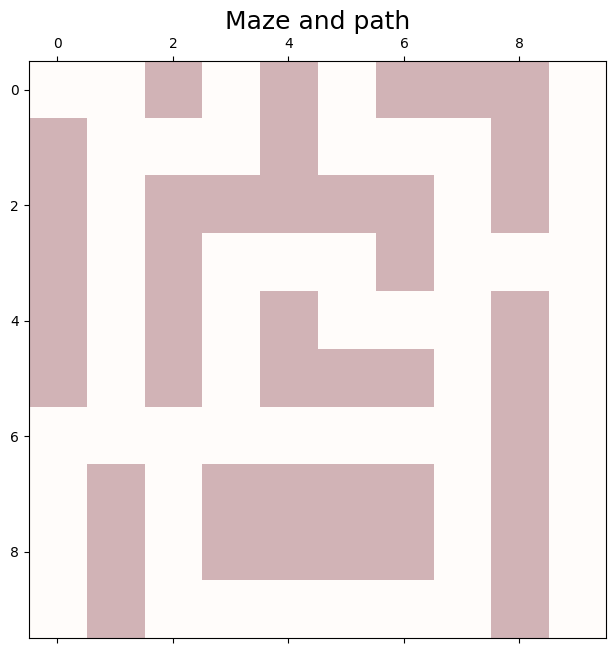

Made EGreedy
1540
1712
502
936
618
350
714
382
216
64
52
120
280
42
458
84
86
112
68
42
28
58
28
30
24
28
38
28
26
32
24
26
24
24
28
26
26
28
42
24
28
26
26
34
30
24
24
26
24
32
32
28
30
26
28
24
26
26
24
24
24
24
24
28
24
26
44
26
32
24
28
24
28
26
26
24
26
28
24
26
24
26
26
28
28
26
26
26
26
26
26
30
26
24
62
26
24
26
28
28
24
24
26
24
26
28
24
24
30
24
34
30
24
28
26
34
24
30
26
24
26
24
34
26
28
24
24
28
32
28
26
24
26
28
26
26
28
26
30
26
26
26
30
26
26
26
26
28
24
24
24
26
32
30
28
30
28
28
30
24
26
30
24
28
26
26
26
30
28
28
26
26
30
28
26
24
36
28
24
28
36
28
30
28
26
26
24
26
30
24
28
30
28
28
34
26
24
32
26
30
28
26
26
32
28
32
28
26
32
26
28
24
26
24
30
24
26
28
24
24
24
28
32
26
26
28
26
24
26
26
30
26
26
26
24
26
30
28
26
24
28
28
26
26
24
26
24
24
26
28
30
28
28
26
30
30
26
26
26
26
30
28
32
26
28
28
26
28
30
26
26
26
30
32
24
30
26
26
24
26
24
26
26
24
24
28
26
26
26
28
30
24
26
26
24
28
26
24
32
30
28
30
26
24
28
24
30
28
24
24
24
28
32
24
28
26
28
26
24
28
26
28
30
28


In [2]:
# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)
maze.visualize()
# Set the reward at the bottom right to 10
maze.set_reward(maze.get_state(9, 9), 10)

steps_per_iter = []

for i in range(10):
    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    eps = 0.1

    stop = False
    iter = 30000

    steps = 0
    iterations = 0

    # keep learning until you decide to stop
    while not stop:
        if robot.get_state(maze).x  == 9 and robot.get_state(maze).y == 9:
            steps += robot.nr_of_actions_since_reset
            iterations += 1
            robot.reset()
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        #print(current_action, robot.get_state(maze))
        
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        alfa = 0.2
        gamma = 0.9

        learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        iter -= 1
        if iter == 0:
            break
        #robot.do_action(action=current_action, maze=maze)
        # TODO implement the action selection and learning cycle
        # TODO figure out a stopping criterion
    steps /= iterations
    steps_per_iter.append(steps)

[36.627594627594625, 39.861702127659576, 48.89722675367047, 34.31121281464531, 42.17440225035162, 39.36482939632546, 48.58995137763371, 45.78320610687023, 41.19505494505494, 38.49037227214377]


(0.0, 97.79445350734095)

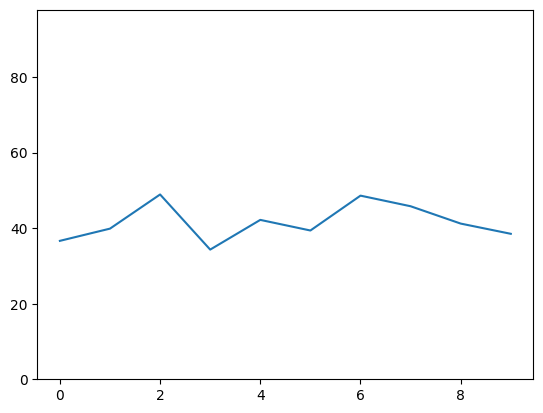

In [3]:
import matplotlib.pyplot as plt
import numpy as np

print(steps_per_iter)

plt.plot(range(len(steps_per_iter)), steps_per_iter)
plt.ylim(0, np.max(steps_per_iter) * 2)